# PRMS6 Surface BMI demo

This is a simple demonstration of the PRMS6 Surface-BMI. The Surface-BMI includes all PRMS6 components above the soil-zone.
* The surface-BMI builds on PRMS6 by Parker Norton (USGS)
    * https://github.com/nhm-usgs/prms/releases/tag/6.0.0_bmi-testing
* The Fortran Suface-BMI by Rich McDonald and Steve Markstrom (USGS)
    * https://github.com/nhm-usgs/bmi-prms6-surface
* The CSDMS-BMI-PyMT package by Mark Piper and Eric Hutton (CSDMS, CU-Boulder)
    * https://github.com/pymt-lab/pymt_prms_surface
    
* More info about PyMT
    * https://csdms.github.io/pymt/
    
    
## Demo of the Pipestem project

In [1]:
%matplotlib inline
import numpy as np
from pymt.models import PRMSSurface, PRMSSoil
from pathlib import Path
import prms6bmi
import geopandas as gpd
import pandas as pd

➡ models: PRMSSurface, PRMSSoil


___
The next few slides read the the pipestem shapefile for use in plotting results below.
* The shapefile is filtered to include only the HRUs simulated
* The shapefile is reordered according to the ordering in the PRMS project
___

In [2]:
gdf = gpd.read_file('GIS/pipestem_hru_geographic.shp')
gdf.head()


,LAYER,hru_id_loc,hru_id,region,geometry
0,Unknown Area Type,2265,57848,r10u,"POLYGON ((-209834.804 2666444.996, -209835.087..."
1,Unknown Area Type,2267,57850,r10u,"MULTIPOLYGON (((-207734.972 2661663.705, -2077..."
2,Unknown Area Type,2270,57853,r10u,"POLYGON ((-210435.192 2666555.949, -210435.282..."
3,Unknown Area Type,2272,57855,r10u,"POLYGON ((-210855.095 2670974.953, -210884.836..."
4,Unknown Area Type,2273,57856,r10u,"POLYGON ((-218474.797 2677545.102, -218445.082..."


### Create and Initialize the pipestem project and PRMSSurface model
___

In [3]:
run_dir = '../prms/pipestem'
config_surf= 'control_surf.default'
config_soil = 'control_soil.default'
print(Path(run_dir).exists())
print((Path(run_dir) / config_surf).exists())
print((Path(run_dir) / config_soil).exists())
      
msurf = PRMSSurface()
msoil = PRMSSoil()

print(msurf.name, msoil.name)


True
True
True
prms6-surface-BMI prms6-BMI-SOIL


In [4]:
soil_input_cond_vars = ['soil_rechr_chg', 'soil_moist_chg']

soil_input_vars = ['hru_ppt', 'hru_area_perv', 'hru_frac_perv', 'dprst_evap_hru', 
                   'dprst_seep_hru', 'infil', 'sroff','potet', 'hru_intcpevap', 
                   'snow_evap', 'snowcov_area', 'soil_rechr', 'soil_rechr_max', 
                   'soil_moist', 'soil_moist_max', 'hru_impervevap' , 
                   'srunoff_updated_soil','transp_on']

soil2surf_vars = ['infil', 'sroff', 'soil_rechr', 'soil_moist']

def surface2soil(msurf, msoil, exch_vars, cond_vars, dprst_flag, imperv_flag):
    for var in exch_vars:
        msoil.set_value(var, msurf.get_value(var))
    if dprst_flag in [1, 3] or imperv_flag in [1, 3]:
        for var in cond_vars:
            msoil.set_value(var, msurf.get_value(var))

def soil2surface(msoil, msurf, exch_vars):
    for var in exch_vars:
        msurf.set_value(var, msoil.get_value(var))

In [5]:
msurf.initialize(config_surf, run_dir)
msoil.initialize(config_soil, run_dir)
# m_surf.var['nowtime'].data

### Reorder shapefile according to order in PRMSSurface
---

In [6]:
pd.set_option('mode.chained_assignment', None)
gdf_ps = gdf[gdf['hru_id'].isin(msurf.var['nhm_id'].data)]
print(type(msurf.var['nhm_id'].data))
dindex = np.zeros(np.shape(gdf_ps.hru_id.values), dtype=np.int8)
for index, val in np.ndenumerate(msurf.var['nhm_id'].data):
    tind = np.int(np.where(gdf_ps['hru_id'].values == msurf.var['nhm_id'].data[index])[0])
#     print(type(tind), tind)
    dindex[tind] = np.array([index])
print(dindex)
# # gdf_ps['tindex'] = 0
gdf_ps.loc[:,'tindex'] = dindex
# # # gdf_ps.Index.sort_values()
gdf_ps.sort_values(by=['tindex'], inplace=True)
gdf_ps
# # tmp = np.where(gdf_ps.hru_id.values == m.var['nhm_id'].data[0])
# # print(tmp[0])

<class 'numpy.ndarray'>
[12 13  4 10 11  5  0  1  2  6  7  3  8  9]


,LAYER,hru_id_loc,hru_id,region,geometry,tindex
14,Unknown Area Type,2291,57874,r10u,"POLYGON ((-240014.760 2709947.868, -240014.745...",0
15,Unknown Area Type,2292,57875,r10u,"POLYGON ((-241514.933 2720894.818, -241484.800...",1
16,Unknown Area Type,2295,57878,r10u,"POLYGON ((-263236.937 2720624.914, -263264.907...",2
19,Unknown Area Type,2298,57881,r10u,"POLYGON ((-263204.777 2722334.992, -263204.712...",3
10,Unknown Area Type,2285,57868,r10u,"POLYGON ((-237983.320 2707604.941, -237970.681...",4
13,Unknown Area Type,2290,57873,r10u,"MULTIPOLYGON (((-233025.091 2696955.163, -2330...",5
17,Unknown Area Type,2296,57879,r10u,"POLYGON ((-256485.222 2718105.125, -256455.090...",6
18,Unknown Area Type,2297,57880,r10u,"POLYGON ((-257828.084 2725785.089, -257827.820...",7
20,Unknown Area Type,2299,57882,r10u,"MULTIPOLYGON (((-245144.770 2725005.157, -2451...",8
21,Unknown Area Type,2300,57883,r10u,"POLYGON ((-255345.272 2728364.935, -255345.177...",9


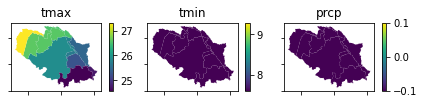

In [7]:
import xarray as xr
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
clim_file = Path('../prms/pipestem/daymet.nc')
clim = xr.open_dataset(clim_file)
ptime = msurf.var['nowtime'].data
timesel = dt.datetime(ptime[0], ptime[1], ptime[2])
start_date = timesel
gdf_ps['tmax'] = clim.tmax.sel(time=timesel)
gdf_ps['tmin'] = clim.tmin.sel(time=timesel)
gdf_ps['prcp'] = clim.prcp.sel(time=timesel)
fig, ax = plt.subplots(ncols=3)
divider0 = make_axes_locatable(ax[0])
divider1 = make_axes_locatable(ax[1])
divider2 = make_axes_locatable(ax[2])
cax0 = divider0.append_axes("right", size="5%", pad=0.1)
cax1 = divider1.append_axes("right", size="5%", pad=0.1)
cax2 = divider2.append_axes("right", size="5%", pad=0.1)
h_tmax = gdf_ps.tmax.max()
l_tmax = gdf_ps.tmax.min()
h_tmin= gdf_ps.tmin.max()
l_tmin= gdf_ps.tmin.min()
h_tmax = gdf_ps.tmax.max()
l_tmax = gdf_ps.tmax.min()
h_ppt= gdf_ps.prcp.max()
l_ppt= gdf_ps.prcp.min()

gdf_ps.plot(column='tmax', ax=ax[0], vmin=l_tmax, vmax=h_tmax, legend=True, label='tmax', cax=cax0)
gdf_ps.plot(column='tmin', ax=ax[1], vmin=l_tmin, vmax=l_tmin, legend=True, label='tmin', cax=cax1)
gdf_ps.plot(column='prcp', ax=ax[2], vmin=l_ppt, vmax=l_ppt, legend=True, label='prcp', cax=cax2)
for i in range(3):
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    if i == 0:
        ax[i].set_title('tmax')
    elif i == 1:
        ax[i].set_title('tmin')
    elif i == 2:
        ax[i].set_title('prcp')
plt.tight_layout()

---

Search for an interesting period to inspect by looking at the cumulative precipitation

---

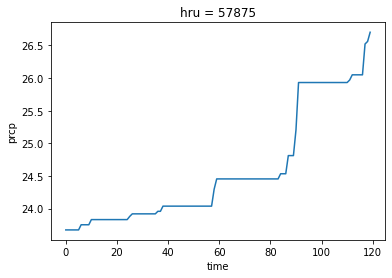

In [8]:
cum_sum= clim.cumsum(dim='time')
cum_sum.prcp.isel(hru=1)[365:485].plot()


---

Get some model time information

---

In [9]:
print(msurf.get_value('nowtime'))
print(msoil.var['nowtime'].data)

[1980    1    1    0    0    0]
[1980    1    1    0    0    0]


In [10]:
# Get time information from the model.
print(f'Start time Surface/Soil: {msurf.start_time}/{msoil.start_time}')
print(f'End time Surface/Soil: {msurf.end_time}/{msoil.end_time}')
print(f'Current time Surface/Soil: {msurf.end_time}/{msoil.end_time}')
print('Nowtime Surface/Soil:', msurf.var['nowtime'].data, msoil.var['nowtime'].data)

Start time Surface/Soil: 0.0/0.0
End time Surface/Soil: 13180.0/13180.0
Current time Surface/Soil: 13180.0/13180.0
Nowtime Surface/Soil: [1980    1    1    0    0    0] [1980    1    1    0    0    0]


In [11]:
dprst_flag = msoil.get_value('dyn_dprst_flag')
imperv_flag = msoil.get_value('dyn_imperv_flag')

def update_coupled(msurf, msoil, dprst_flag, imperv_flag):
    msurf.update()
    surface2soil(msurf, msoil, soil_input_vars, soil_input_cond_vars, dprst_flag, imperv_flag)
    msoil.update()
    soil2surface(msoil, msurf, soil2surf_vars)

In [12]:
for time in range(448):
    update_coupled(msurf, msoil, dprst_flag, imperv_flag)

[1981    3   24    0    0    0] 1981-03-24 00:00:00
[1981    3   25    0    0    0] 1981-03-25 00:00:00
[1981    3   26    0    0    0] 1981-03-26 00:00:00
[1981    3   27    0    0    0] 1981-03-27 00:00:00
[1981    3   28    0    0    0] 1981-03-28 00:00:00
[1981    3   29    0    0    0] 1981-03-29 00:00:00
[1981    3   30    0    0    0] 1981-03-30 00:00:00
[1981    3   31    0    0    0] 1981-03-31 00:00:00
[1981    4    1    0    0    0] 1981-04-01 00:00:00
[1981    4    2    0    0    0] 1981-04-02 00:00:00
[1981    4    3    0    0    0] 1981-04-03 00:00:00
[1981    4    4    0    0    0] 1981-04-04 00:00:00
[1981    4    5    0    0    0] 1981-04-05 00:00:00
[1981    4    6    0    0    0] 1981-04-06 00:00:00


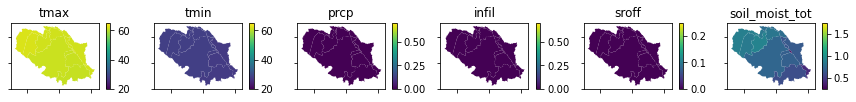

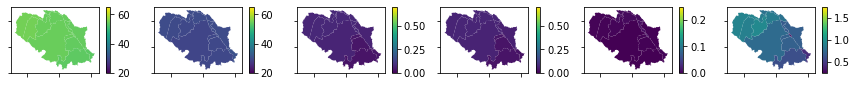

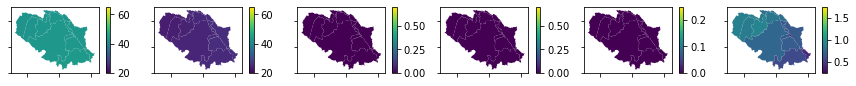

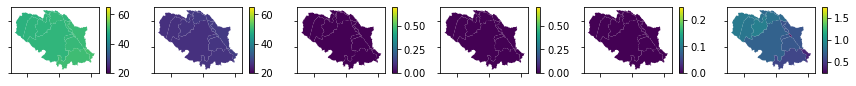

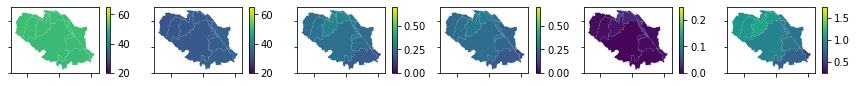

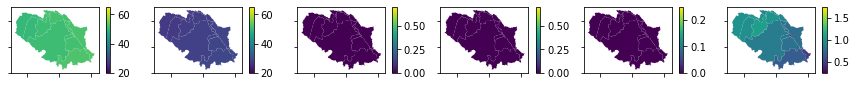

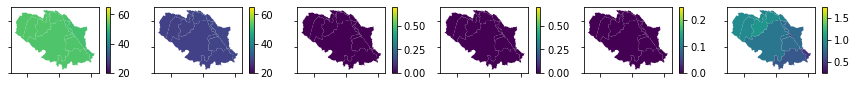

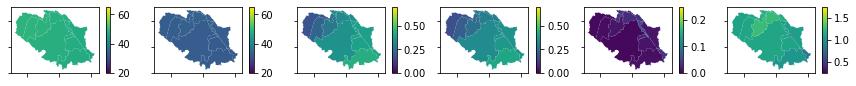

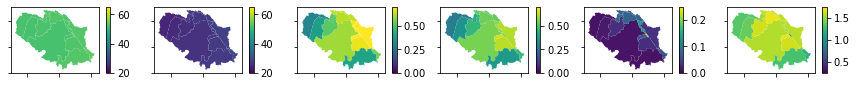

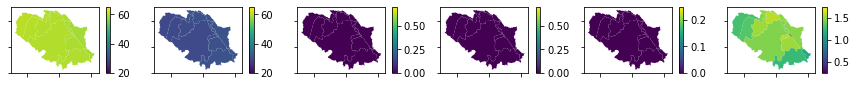

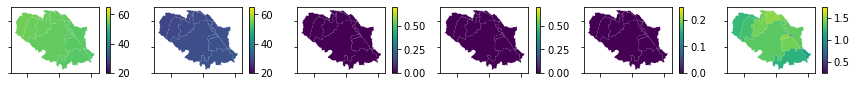

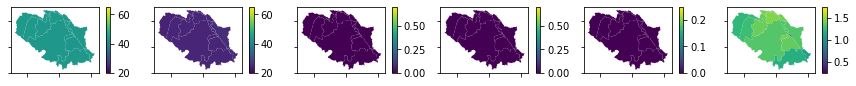

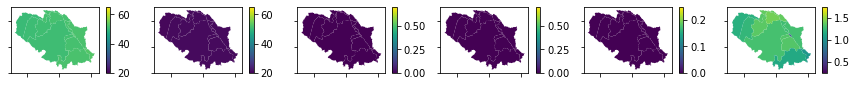

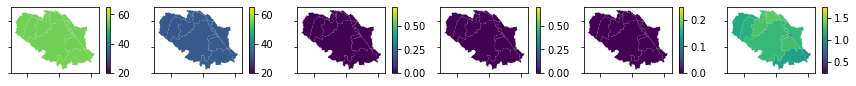

In [13]:
def example_plot(msurf, msoil, j, timesel):
    gdf_ps['tmax'] = clim.tmax.sel(time=timesel)
    gdf_ps['tmin'] = clim.tmin.sel(time=timesel)
    gdf_ps['prcp'] = clim.prcp.sel(time=timesel)

    gdf_ps['infil'] = msurf.var['infil'].data
    gdf_ps['sroff'] = msurf.var['sroff'].data
    gdf_ps['soil_moist_tot'] = msoil.var['soil_moist_tot'].data

    fig, ax = plt.subplots(ncols=6, figsize = (12,2))
    divider0 = make_axes_locatable(ax[0])
    divider1 = make_axes_locatable(ax[1])
    divider2 = make_axes_locatable(ax[2])
    divider3 = make_axes_locatable(ax[3])
    divider4 = make_axes_locatable(ax[4])
    divider5 = make_axes_locatable(ax[5])
    cax0 = divider0.append_axes("right", size="5%", pad=0.1)
    cax1 = divider1.append_axes("right", size="5%", pad=0.1)
    cax2 = divider2.append_axes("right", size="5%", pad=0.1)
    cax3 = divider3.append_axes("right", size="5%", pad=0.1)
    cax4 = divider4.append_axes("right", size="5%", pad=0.1)
    cax5 = divider5.append_axes("right", size="5%", pad=0.1)
    
    gdf_ps.plot(column='tmax', vmin=20.0, vmax=65.0, ax=ax[0], legend=True, cax=cax0)
    gdf_ps.plot(column='tmin', vmin=20.0, vmax=65.0, ax=ax[1], legend=True, cax=cax1)
    gdf_ps.plot(column='prcp', vmin=0.0, vmax=0.7, ax=ax[2], legend=True, cax=cax2)
    gdf_ps.plot(column='infil', vmin=0.0, vmax=0.7, ax=ax[3], legend=True, cax=cax3)
    gdf_ps.plot(column='sroff', vmin=0.0, vmax=0.25, ax=ax[4], legend=True, cax=cax4)
    gdf_ps.plot(column='soil_moist_tot', vmin=0.25, vmax=1.75, ax=ax[5], legend=True, cax=cax5)
    for i in range(6):
        ax[i].set_xticklabels([])
        ax[i].set_yticklabels([])
        if j == 0:
            if i == 0:
                ax[i].set_title('tmax')
            elif i == 1:
                ax[i].set_title('tmin')
            elif i == 2:
                ax[i].set_title('prcp')
            elif i == 3:
                ax[i].set_title('infil')
            elif i == 4:
                ax[i].set_title('sroff')
            elif i == 5:
                ax[i].set_title('soil_moist_tot')
    plt.tight_layout()
    
for i in range(14):
    update_coupled(msurf, msoil, dprst_flag, imperv_flag)
    ptime = msurf.var['nowtime'].data
    timesel = dt.datetime(ptime[0], ptime[1], ptime[2])
    print(ptime, timesel)
    example_plot(msurf, msoil, i, timesel)

In [14]:
nhm_id = msurf.get_value('nhm_id')
nhm_id
ppt_override = msurf.get_value('hru_ppt')
ppt_override[:]= 0.0
ppt_override[0] = 3
ppt_override

array([ 3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

[1981    4    7    0    0    0] 1981-04-07 00:00:00
[1981    4    8    0    0    0] 1981-04-08 00:00:00
[1981    4    9    0    0    0] 1981-04-09 00:00:00
[1981    4   10    0    0    0] 1981-04-10 00:00:00
[1981    4   11    0    0    0] 1981-04-11 00:00:00
[1981    4   12    0    0    0] 1981-04-12 00:00:00
[1981    4   13    0    0    0] 1981-04-13 00:00:00
[1981    4   14    0    0    0] 1981-04-14 00:00:00
[1981    4   15    0    0    0] 1981-04-15 00:00:00
[1981    4   16    0    0    0] 1981-04-16 00:00:00
[1981    4   17    0    0    0] 1981-04-17 00:00:00
[1981    4   18    0    0    0] 1981-04-18 00:00:00
[1981    4   19    0    0    0] 1981-04-19 00:00:00
[1981    4   20    0    0    0] 1981-04-20 00:00:00


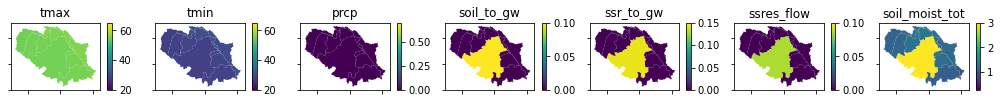

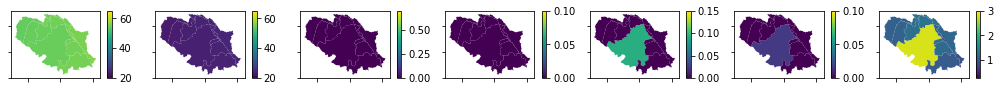

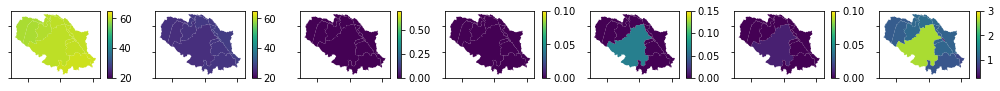

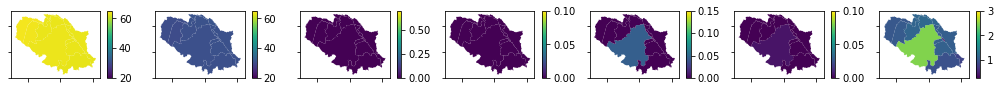

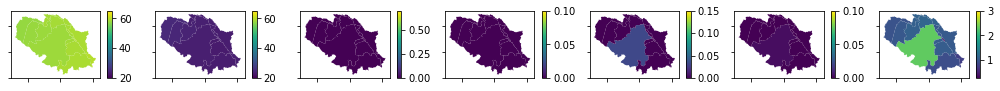

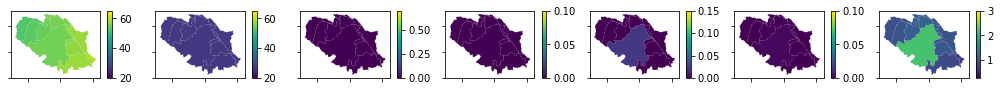

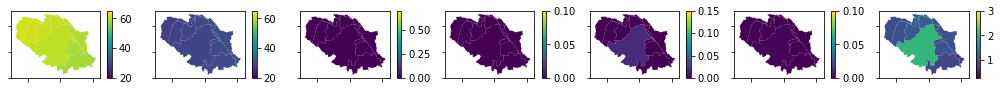

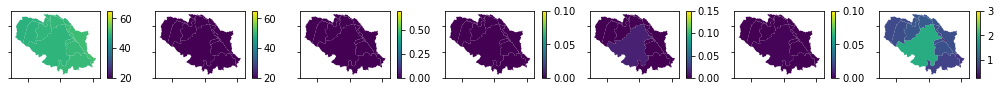

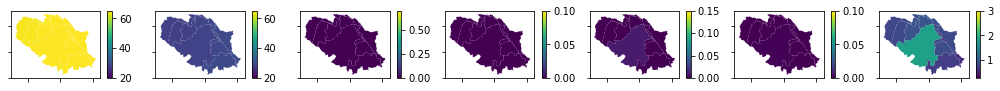

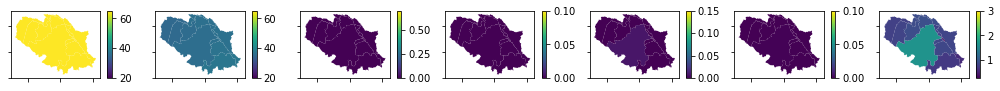

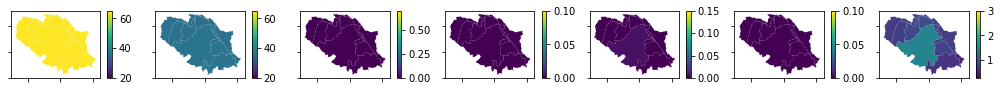

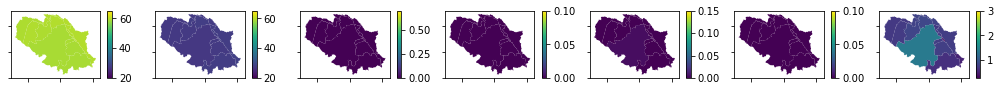

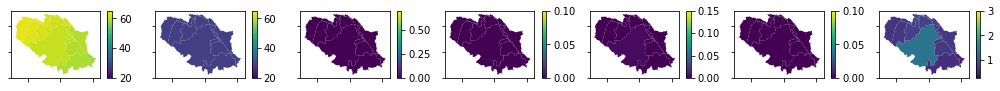

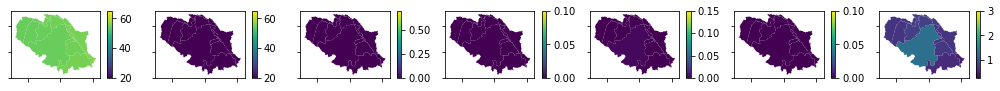

In [15]:
def example_plot(msurf, msoil, j, timesel):
    gdf_ps['tmax'] = clim.tmax.sel(time=timesel)
    gdf_ps['tmin'] = clim.tmin.sel(time=timesel)
    gdf_ps['prcp'] = clim.prcp.sel(time=timesel)

    gdf_ps['soil_to_gw'] = msoil.var['soil_to_gw'].data
    gdf_ps['ssr_to_gw'] = msoil.var['ssr_to_gw'].data
    gdf_ps['ssres_flow'] = msoil.var['ssres_flow'].data
    gdf_ps['soil_moist_tot'] = msoil.var['soil_moist_tot'].data

    fig, ax = plt.subplots(ncols=7, figsize = (14,2))
    divider0 = make_axes_locatable(ax[0])
    divider1 = make_axes_locatable(ax[1])
    divider2 = make_axes_locatable(ax[2])
    divider3 = make_axes_locatable(ax[3])
    divider4 = make_axes_locatable(ax[4])
    divider5 = make_axes_locatable(ax[5])
    divider6 = make_axes_locatable(ax[6])
    cax0 = divider0.append_axes("right", size="5%", pad=0.1)
    cax1 = divider1.append_axes("right", size="5%", pad=0.1)
    cax2 = divider2.append_axes("right", size="5%", pad=0.1)
    cax3 = divider3.append_axes("right", size="5%", pad=0.1)
    cax4 = divider4.append_axes("right", size="5%", pad=0.1)
    cax5 = divider5.append_axes("right", size="5%", pad=0.1)
    cax6 = divider6.append_axes("right", size="5%", pad=0.1)
    
    gdf_ps.plot(column='tmax', vmin=20.0, vmax=65.0, ax=ax[0], legend=True, cax=cax0)
    gdf_ps.plot(column='tmin', vmin=20.0, vmax=65.0, ax=ax[1], legend=True, cax=cax1)
    gdf_ps.plot(column='prcp', vmin=0.0, vmax=0.7, ax=ax[2], legend=True, cax=cax2)
    gdf_ps.plot(column='soil_to_gw', vmin=0.0, vmax=0.1, ax=ax[3], legend=True, cax=cax3)
    gdf_ps.plot(column='ssr_to_gw', vmin=0.0, vmax=0.15, ax=ax[4], legend=True, cax=cax4)
    gdf_ps.plot(column='ssres_flow', vmin=0.0, vmax=0.1, ax=ax[5], legend=True, cax=cax5)
    gdf_ps.plot(column='soil_moist_tot', vmin=0.25, vmax=3.0, ax=ax[6], legend=True, cax=cax6)
    for i in range(7):
        ax[i].set_xticklabels([])
        ax[i].set_yticklabels([])
        if j == 0:
            if i == 0:
                ax[i].set_title('tmax')
            elif i == 1:
                ax[i].set_title('tmin')
            elif i == 2:
                ax[i].set_title('prcp')
            elif i == 3:
                ax[i].set_title('soil_to_gw')
            elif i == 4:
                ax[i].set_title('ssr_to_gw')
            elif i == 5:
                ax[i].set_title('ssres_flow')
            elif i == 6:
                ax[i].set_title('soil_moist_tot')
    plt.tight_layout()
    
for i in range(14):
    if i == 0:
        ppt_override = msurf.get_value('hru_ppt')
        ppt_override[:]= 0.0
        ppt_override[0] = 3
        msurf.set_value('hru_ppt', ppt_override)
        
    update_coupled(msurf, msoil, dprst_flag, imperv_flag)
    ptime = msurf.var['nowtime'].data
    timesel = dt.datetime(ptime[0], ptime[1], ptime[2])
    print(ptime, timesel)
    example_plot(msurf, msoil, i, timesel)

### Plot the HRUs